# Implement K-Means clustering on Iris.csv dataset. Determine the number of clusters using the elbow method.

## Loading dataset

In [1]:
import pandas as pd

iris = pd.read_csv('../../Datasets/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [3]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Splitting data into X and Y

In [4]:
X = iris.drop('Species',axis=1)
y = iris['Species']

## Fitting K-means Clustering

In [5]:
from sklearn.cluster import KMeans
sse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X,y)
    sse.append(kmeans.inertia_)

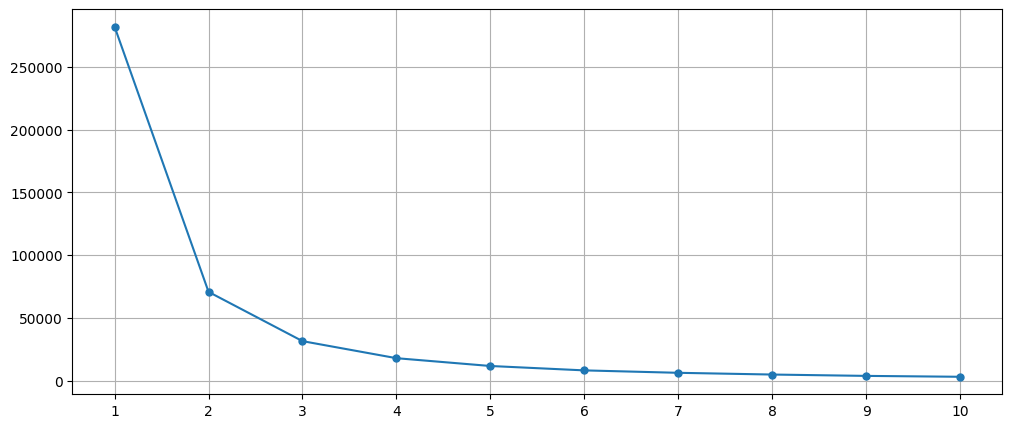

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(range(1,11),sse,marker='.',markersize=10);
plt.grid()
plt.xticks(range(1,11));

Till `k = 3`, there was steep curve, after that it flatten outs, this means that 3 should be the optimal number of clusters

In [24]:
k=3
kmeans = KMeans(n_clusters=k)
kmeans.fit(X,y)

KMeans(n_clusters=3)

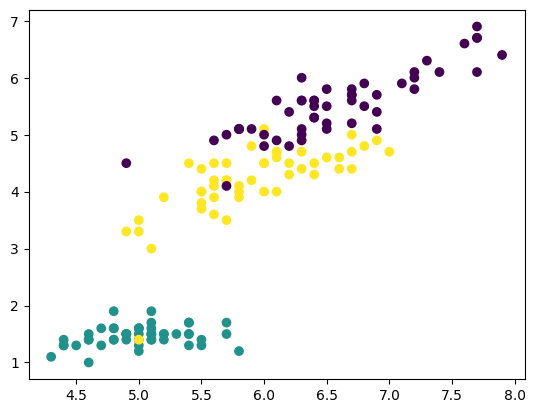

In [28]:
plt.scatter(X['SepalLengthCm'],X['PetalLengthCm'],c=kmeans.labels_);

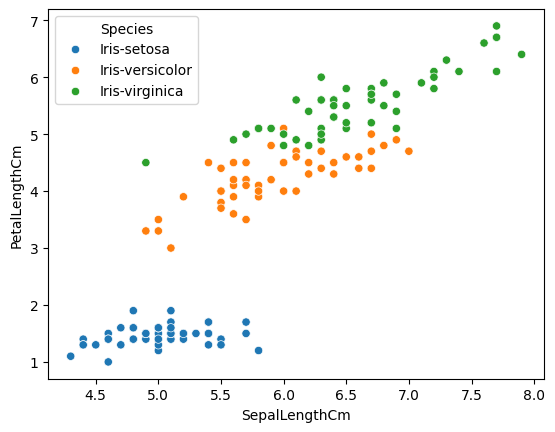

In [23]:
import seaborn as sns
sns.scatterplot(x='SepalLengthCm',y='PetalLengthCm',hue='Species',data=iris);